## Processamento de Linguagem Natural para Análise de Críticas de Filmes

Database em https://www.kaggle.com/luisfredgs/imdb-ptbr

In [1]:
import pandas as pd

In [2]:
review = pd.read_csv("imdb-reviews-pt-br.csv")
review.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
review.tail()

,id,text_en,text_pt,sentiment
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos


In [4]:
# trocando neg por 0 e pos por 1
change = review["sentiment"].replace(["neg", "pos"], [0, 1])
change.head()

0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

In [5]:
# adicionando coluna a review
review["sentimentBIN"] = change
review.head()

,id,text_en,text_pt,sentiment,sentimentBIN
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [6]:
# checando se dados estão balanceados para executar treinamento
print(review["sentiment"].value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [7]:
# retirando acentuação
!pip install unidecode
import unidecode

withoutAccentuation = list()

for i in review["text_pt"]: 
    withoutAccentuation.append(unidecode.unidecode(i))
    
review['reviewWithoutAccentuation'] = withoutAccentuation

review['reviewWithoutAccentuation'][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessario. Alem das terriveis sequencias de resgate no mar, das quais ha muito poucas, eu simplesmente nao me importei com nenhum dos personagens. A maioria de nos tem fantasmas no armario, e o personagem Costers e realizado logo no inicio, e depois esquecido ate muito mais tarde, quando eu nao me importava. O personagem com o qual deveriamos nos importar e muito arrogante e superconfiante, Ashton Kutcher. O problema e que ele sai como um garoto que pensa que e melhor do que qualquer outra pessoa ao seu redor e nao mostra sinais de um armario desordenado. Seu unico obstaculo parece estar vencendo Costner. Finalmente, quando estamos bem alem do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher e levado a ser o melhor sem pressentimentos ou pressagios anteriores. Nenhuma magica aqui, era tudo que eu podia fazer para nao desligar uma hora.'

In [8]:
# deixando tudo minúsculo
lowercasePhrase = list()

for i in review["reviewWithoutAccentuation"]: 
    lowercasePhrase.append(i.lower())

review['reviewLowercase'] = lowercasePhrase

review.head()

,id,text_en,text_pt,sentiment,sentimentBIN,reviewWithoutAccentuation,reviewLowercase
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais uma vez, o Sr. Costner arrumou um filme p...","mais uma vez, o sr. costner arrumou um filme p..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este e um exemplo do motivo pelo qual a maiori...,este e um exemplo do motivo pelo qual a maiori...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro de tudo eu odeio esses raps imbecis, ...","primeiro de tudo eu odeio esses raps imbecis, ..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem mesmo os Beatles puderam escrever musicas ...,nem mesmo os beatles puderam escrever musicas ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,Filmes de fotos de latao nao e uma palavra apr...,filmes de fotos de latao nao e uma palavra apr...


In [9]:
# download data
!pip install -U nltk
import nltk
nltk.download('all')

Requirement already up-to-date: nltk in /Users/izabellamelo/miniconda3/lib/python3.7/site-packages (3.4)


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package cess_

[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package subjectivity is already up-to-date!
[nltk_data]    | Downloading package swadesh to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package swadesh is already up-to-date!
[nltk_data]    | Downloading package switchboard to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]    |   Package switchboard is already up-to-date!
[nltk_data]    | Downloading package timit to
[nltk_data]    |     /Users/izabellamelo/nltk_data...
[nltk_data]

True

In [10]:
# stop words da ntlk
from nltk import tokenize
stopWords = list()

stopWordsNLTK = nltk.corpus.stopwords.words("portuguese")

for i in stopWordsNLTK:
    stopWords.append(unidecode.unidecode(i))

# stop words de pontuação
from string import punctuation
punctuationStopWords = list()

for dot in punctuation:
    punctuationStopWords.append(dot)
    
stopWords.extend(punctuationStopWords)

# stop words de caso
newStopWords = ["..."]
stopWords.extend(newStopWords)

print(stopWords)
    

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'nao', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'a', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'ja', 'eu', 'tambem', 'so', 'pelo', 'pela', 'ate', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'voce', 'essa', 'num', 'nem', 'suas', 'meu', 'as', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nos', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'voces', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'esta', 'estamos', 'estao', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estavamos', 'estavam', 'estivera', 'estiveramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivessemos', 'estivessem', 'estiver', 'estivermos

In [11]:
withoutStopWords = list()
token = tokenize.WordPunctTokenizer()

for i in review["reviewLowercase"]:
    phrase = list()
    textWords = token.tokenize(i)
    
    for words in textWords:
        if words not in stopWords:
            phrase.append(words)
    
    withoutStopWords.append(' '.join(phrase))

review['reviewWithoutStopWords'] = withoutStopWords

review.head()

,id,text_en,text_pt,sentiment,sentimentBIN,reviewWithoutAccentuation,reviewLowercase,reviewWithoutStopWords
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais uma vez, o Sr. Costner arrumou um filme p...","mais uma vez, o sr. costner arrumou um filme p...",vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este e um exemplo do motivo pelo qual a maiori...,este e um exemplo do motivo pelo qual a maiori...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro de tudo eu odeio esses raps imbecis, ...","primeiro de tudo eu odeio esses raps imbecis, ...",primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem mesmo os Beatles puderam escrever musicas ...,nem mesmo os beatles puderam escrever musicas ...,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,Filmes de fotos de latao nao e uma palavra apr...,filmes de fotos de latao nao e uma palavra apr...,filmes fotos latao palavra apropriada verdade ...


In [38]:
review["reviewWithoutStopWords"][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [12]:
# retirando radical
stemmer = nltk.RSLPStemmer()
stemmerPhrase = list()

token = tokenize.WordPunctTokenizer()

for i in review["reviewWithoutStopWords"]:
    phrase = list()
    textWords = token.tokenize(i)
    
    for words in textWords:
        phrase.append(stemmer.stem(words))
    
    stemmerPhrase.append(' '.join(phrase))

review['reviewStemmer'] = stemmerPhrase

In [44]:
review['reviewStemmer'][0]

'vez sr costn arrum film temp necessari alem terri sequenc resgat mar qual pouc simples import nenhum person maior fantasm armari person cost realiz log inici esquec tard import person deveri import arrog superconfi ashton kutch problem sai garot pens melhor qualqu outr pesso redor mostr sinal armari desorden unic obstacul parec est venc costn final bem alem mei caminh costn cont sobr fantasm kutch inform kutch lev ser melhor pressent pressagi anteri nenhum magic aqu tud pod faz deslig hor'

### TF-IDF

é uma medida estatística que tem o intuito de indicar a importância de uma palavra de um documento em relação a uma coleção de documentos ou em um corpus linguístico

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

modelTfidf = TfidfVectorizer(ngram_range=(1, 2))

tfidf = modelTfidf.fit_transform(review["reviewStemmer"])
trainTfidf, testTfidf, trainClassTfidf, testClassTfidf = train_test_split(tfidf, review["sentimentBIN"], 
                                                                          random_state = 50)

In [51]:
# treinando
logisticRegression = LogisticRegression(solver='lbfgs')
logisticRegression.fit(trainTfidf, trainClassTfidf)

# testando
scoreTfidf = logisticRegression.score(testTfidf, testClassTfidf)
print("Taxa de Acerto:", scoreTfidf)

Taxa de Acerto: 0.8884755357864942


In [47]:
# 42
#text_pt                    88,8%
#reviewWithoutAccentuation  88,8% (nao converge)
#reviewLowercase            88,8% (nao converge)
#reviewWithoutStopWords     88,9%
#reviewStemmer              88,5%
#ngrams                     88,7%

# 50
#text_pt                    89,0% 88,9%
#reviewWithoutAccentuation  89,0% 
#reviewLowercase            89,0%
#reviewWithoutStopWords     88,8%
#reviewStemmer              88,6%
#ngrams                     89,2%

# 38
#text_pt                    89,3%
#reviewWithoutAccentuation  89,3% 
#reviewLowercase            89,3%
#reviewWithoutStopWords     89,3%
#reviewStemmer              88,7%
#ngrams                     88,9%


In [54]:
peso = pd.DataFrame(
    logisticRegression.coef_[0].T,
    index = modelTfidf.get_feature_names()
)

peso.nlargest(50,0)

,0
otim,9.713619
excel,9.008586
perfeit,7.082218
maravilh,6.613370
incri,5.795386
favorit,5.657166
divert,5.591932
ador,4.640643
hoj,4.370076
vid,4.343511


In [55]:
peso.nsmallest(50,0)


,0
ruim,-12.030893
pi,-11.317529
horri,-9.711197
terri,-8.290917
chat,-7.980198
nad,-7.396146
parec,-6.406452
nenhum,-6.073932
tent,-5.783123
mal,-5.717252


### WORLD CLOUD

Biblioteca em https://github.com/amueller/word_cloud

In [14]:
!pip install wordcloud
!python -m pip install -U matplotlib

%matplotlib inline

Requirement already up-to-date: matplotlib in /Users/izabellamelo/miniconda3/lib/python3.7/site-packages (3.0.3)


In [63]:
from wordcloud import WordCloud

# nuvem de palavras positivas
posReview = review.query("sentiment=='pos'")

wordsPos = ' '.join([word for word in posReview["reviewWithoutStopWords"]])

vi film ont noit ser persuad algum amig admit relut ve lo porqu sab ashton kutch consegu faz comed err kutch interpret person jak fisch bem kevin costn interpret ben randall tal profission sinal bom film pod brinc emoco fez exat tod teatr vend super ris dur prim metad film lev lagr dur segund semestr sair teatr vi muit mulh lagr muit hom adult tent desesperad deix ning ve lo chor film otim sugir va ve lo ant julg


In [64]:
cloudPos = WordCloud(background_color="white",
                     width=800, height=500, max_font_size=110, collocations=False).generate(wordsPos)

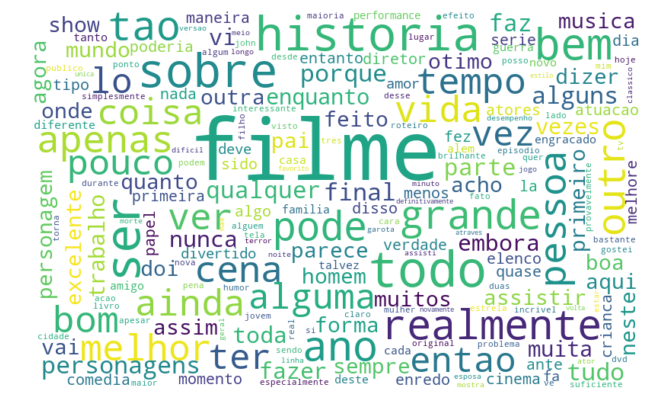

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,7))
plt.imshow(cloudPos, interpolation="bilinear")
plt.axis("off")
plt.show()

In [66]:
# nuvem de palavras negativas
negReview = review.query("sentiment=='neg'")

wordsNeg = ' '.join([word for word in negReview["reviewWithoutStopWords"]])

In [67]:
cloudNeg = WordCloud(background_color="white", width=800, height=500, max_font_size=110, 
                     collocations=False).generate(wordsNeg)

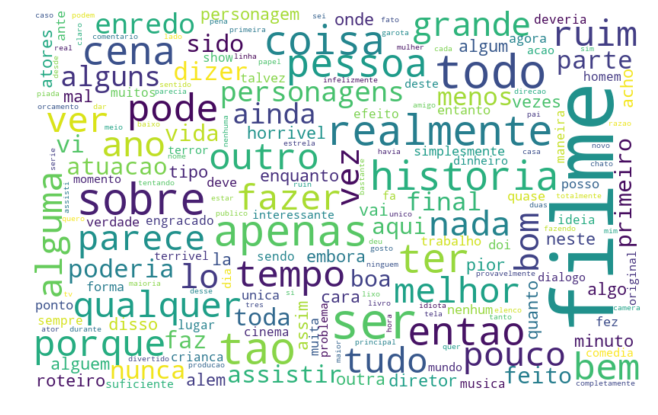

In [68]:
plt.figure(figsize=(30,7))
plt.imshow(cloudNeg, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
token = tokenize.WordPunctTokenizer()
allWords = ' '.join([text for text in review["reviewStemmer"]])

frequency = nltk.FreqDist(token.tokenize(allWords))

frequencyDF = pd.DataFrame({"Palavras": list(frequency.keys()),
                           "Frequencia": list(frequency.values())})
frequencyDF.head()

,Palavras,Frequencia
0,vez,25548
1,sr,1894
2,costn,82
3,arrum,118
4,film,192424


In [22]:
frequencyDFtop10 = frequencyDF.nlargest(columns="Frequencia", n=10)
frequencyDFtop10

,Palavras,Frequencia
4,film,192424
126,tod,45616
64,pod,43725
441,algum,37807
65,faz,37152
57,ser,36888
107,real,36548
54,sobr,29531
38,outr,28816
46,parec,27268


In [23]:
!pip install seaborn

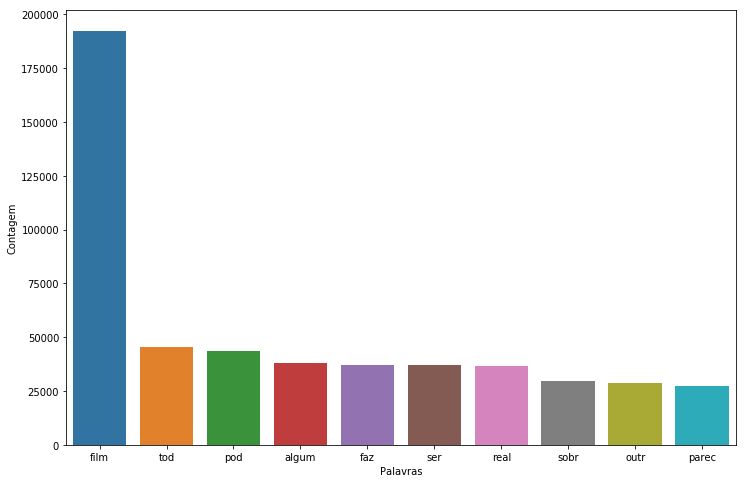

In [24]:
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.barplot(data=frequencyDFtop10, x="Palavras", y="Frequencia")
ax.set(ylabel="Contagem")
plt.show()

### BAG OF WORDS
Neste modelo, o texto (uma frase ou documento) é representado como um multiconjunto de suas palavras (o "saco"), desconsiderando a estrutura gramatical e até mesmo a ordenação delas, mas mantendo sua multiplicidade


In [25]:
# implementando bag of words (fazendo dicionário de palavras)
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
model = CountVectorizer(lowercase=True)

bagOfWords = model.fit_transform(review["reviewStemmer"])
model.get_feature_names()

['00',
 '000',
 '0000000000001',
 '0000001',
 '00001',
 '00015',
 '000dm',
 '000wtf',
 '001',
 '003830',
 '006',
 '0069',
 '007',
 '0079',
 '0080',
 '0083',
 '009',
 '0093638',
 '00o',
 '00schneid',
 '01',
 '0126',
 '0148',
 '02',
 '020410',
 '0230',
 '029',
 '02an',
 '02eu',
 '03',
 '039',
 '04',
 '041',
 '044',
 '05',
 '050',
 '05nomactr',
 '06',
 '06h15',
 '07',
 '07b',
 '08',
 '087',
 '089',
 '08o',
 '08th',
 '09',
 '0and',
 '0clock',
 '0f',
 '0ne',
 '0r',
 '0s',
 '0ttmay',
 '10',
 '100',
 '1000',
 '10000',
 '1000000',
 '10000000000000',
 '1001',
 '1004',
 '100b',
 '100bt',
 '100ib',
 '100k',
 '100mim',
 '100min',
 '100x',
 '101',
 '102',
 '103',
 '104',
 '1040',
 '105',
 '1050',
 '10576',
 '106',
 '106min',
 '107',
 '108',
 '1080',
 '1080p',
 '109',
 '10_',
 '10a',
 '10assim',
 '10awful',
 '10bas',
 '10bscdb',
 '10cheesines',
 '10clark',
 '10classific',
 '10cruisweight',
 '10cuid',
 '10cw',
 '10d',
 '10descolad',
 '10desculp',
 '10eliason',
 '10enjoy',
 '10entreten',
 '10est',
 '1

In [27]:
# transformando numa matriz para visualizar melhor
dictionary = pd.SparseDataFrame(bagOfWords, columns = model.get_feature_names())
dictionary.head()

,00,000,0000000000001,0000001,00001,00015,000dm,000wtf,001,003830,...,zzzzip,zzzzz,zzzzzzzz,zzzzzzzzz,zzzzzzzzzzzz,zzzzzzzzzzzzpop,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# separando dados para treino e teste (75% treino, 25% teste)
from sklearn.model_selection import train_test_split

In [29]:
train, test, trainClass, testClass = train_test_split(bagOfWords, review["sentimentBIN"], random_state = 42)

In [30]:
print(train.shape)
print(test.shape)

(37094, 69036)
(12365, 69036)


In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
# treinando
logisticRegression = LogisticRegression(solver='lbfgs')
logisticRegression.fit(train, trainClass)

# testando
score = logisticRegression.score(test, testClass)
print(score)

0.8685806712494946


/Users/izabellamelo/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
